In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

import tensorflow.contrib.learn as skflow
from sklearn.metrics import mean_squared_error

from lstm import x_sin, sin_cos, generate_data, lstm_model

In [2]:
LOG_DIR = './ops_logs'
TIMESTEPS = 40
RNN_LAYERS = [{'steps': TIMESTEPS}, {'steps': 40, 'keep_prob': 0.5}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 130000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
regressor = skflow.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                       verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                       learning_rate=0.03, batch_size=BATCH_SIZE)

In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [9]:
X['train'][0][0]

array([ 0.])

In [13]:
y['train'][0]

array([ 0.38945519])

In [18]:
len(X['train'][0])

40

In [19]:
y['train'][1]

array([ 0.39864693])

In [20]:
len(y['train'])

8060

In [21]:
len(X['train'])

8060

In [15]:
X['train'][1]

array([[ 0.01000083],
       [ 0.02000067],
       [ 0.0299985 ],
       [ 0.03999333],
       [ 0.04998416],
       [ 0.05997   ],
       [ 0.06994983],
       [ 0.07992267],
       [ 0.08988751],
       [ 0.09984337],
       [ 0.10978924],
       [ 0.11972412],
       [ 0.12964703],
       [ 0.13955698],
       [ 0.14945297],
       [ 0.159334  ],
       [ 0.16919911],
       [ 0.17904728],
       [ 0.18887755],
       [ 0.19868893],
       [ 0.20848044],
       [ 0.21825109],
       [ 0.22799992],
       [ 0.23772594],
       [ 0.24742818],
       [ 0.25710568],
       [ 0.26675746],
       [ 0.27638256],
       [ 0.28598002],
       [ 0.29554887],
       [ 0.30508816],
       [ 0.31459694],
       [ 0.32407425],
       [ 0.33351915],
       [ 0.34293069],
       [ 0.35230793],
       [ 0.36164993],
       [ 0.37095576],
       [ 0.38022449],
       [ 0.38945519]])

In [ ]:

# create a lstm instance and validation monitor
validation_monitor = skflow.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                       print_steps=PRINT_STEPS,
                                                       early_stopping_rounds=1000,
                                                       )
regressor.fit(X['train'], y['train'])

Step #100, epoch #1, avg. train loss: 0.01639
Step #200, epoch #2, avg. train loss: 0.00325
Step #300, epoch #3, avg. train loss: 0.00246
Step #400, epoch #4, avg. train loss: 0.00197
Step #500, epoch #6, avg. train loss: 0.00161
Step #600, epoch #7, avg. train loss: 0.00139
Step #700, epoch #8, avg. train loss: 0.00116
Step #800, epoch #9, avg. train loss: 0.00103
Step #900, epoch #11, avg. train loss: 0.00092
Step #1000, epoch #12, avg. train loss: 0.00083
Step #1100, epoch #13, avg. train loss: 0.00078
Step #1200, epoch #14, avg. train loss: 0.00074
Step #1300, epoch #16, avg. train loss: 0.00069
Step #1400, epoch #17, avg. train loss: 0.00067
Step #1500, epoch #18, avg. train loss: 0.00064
Step #1600, epoch #19, avg. train loss: 0.00060
Step #1700, epoch #20, avg. train loss: 0.00058
Step #1800, epoch #22, avg. train loss: 0.00057
Step #1900, epoch #23, avg. train loss: 0.00056
Step #2000, epoch #24, avg. train loss: 0.00052
Step #2100, epoch #25, avg. train loss: 0.00051
Step #220

In [23]:
len(X['test'][0])

40

In [6]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

_NotFittedError: 

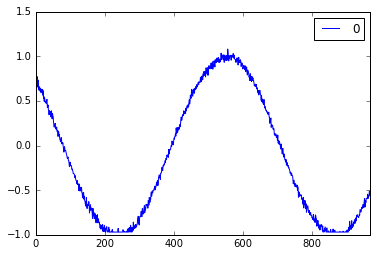

In [6]:
plt.plot(predicted)

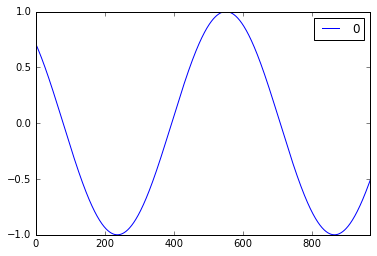

In [7]:
plt.plot(y['test'])

In [7]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = skflow.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                       print_steps=PRINT_STEPS,
                                                       early_stopping_rounds=1000,
                                                       logdir=LOG_DIR)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

TypeError: __init__() got an unexpected keyword argument 'logdir'

In [8]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

_NotFittedError: 

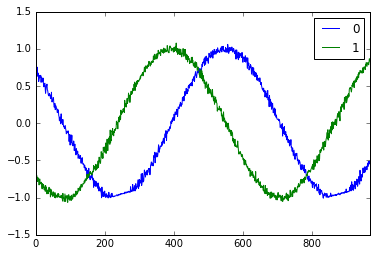

In [7]:
plt.plot(predicted)

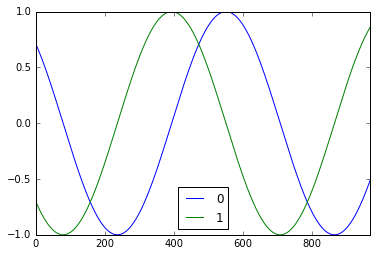

In [6]:
plt.plot(y['test'])

In [9]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [11]:
# create a lstm instance and validation monitor
validation_monitor = skflow.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                       print_steps=PRINT_STEPS,
                                                       early_stopping_rounds=1000,
                                                 )
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

ValueError: In MultiRNNCell, the input size of each next cell must match the output size of the previous one. Mismatched output size in cell 0.

In [20]:
predicted = regressor.predict(X['test'])
score = mean_squared_error(predicted, y['test'])
print "MSE: {}".format(score)

MSE: 61.024454351


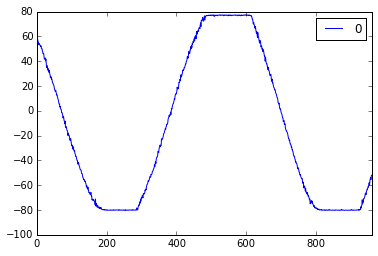

In [8]:
plt.plot(predicted)

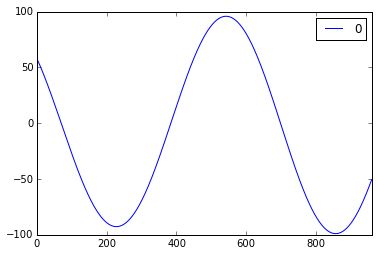

In [14]:
plt.plot(y['test'])

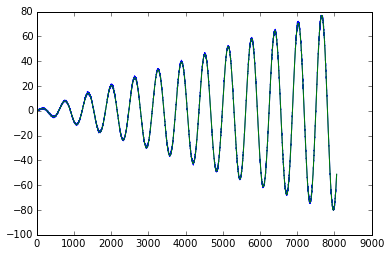

In [19]:
plt.plot(regressor.predict(X['train']))
plt.plot(y['train'])

In [14]:
lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS)(X, y)

ValueError: In MultiRNNCell, the input size of each next cell must match the output size of the previous one. Mismatched output size in cell 0.